In [1]:
from NeuralNetwork import *
import visualization

import numpy as np

np.random.seed(1)

In [2]:
def data_prep(data, train_ratio=0.8, print_summary=True):
    """
    :param data: data to be preprocessed
    :param train_ratio: ratio of training data
    :param print_summary: print summary of data shapes
    :return: data, x_train, y_train, y_train_raw, x_test, y_test, num_classes
    """
    data = np.random.permutation(data)
    data_train = data[:int(len(data) * train_ratio)]
    data_test = data[int(len(data) * train_ratio):]
    x_train = data_train[:, :-1].T
    y_train_raw = data_train[:, -1]
    x_test = data_test[:, :-1].T
    y_test = data_test[:, -1]
    num_classes = len(np.unique(y_train_raw))

    # to one hot
    y_train = DNNClassifier.to_one_hot(y_train_raw, num_classes)
    y_test = y_test.reshape(1, y_test.shape[0])
    if print_summary:
        print('Number of training examples: ', x_train.shape[1])
        print('Number of testing examples: ', x_test.shape[1])
        print('------')
        print('x_train shape: ', x_train.shape)
        print('y_train shape: ', y_train.shape)
        print('x_test shape: ', x_test.shape)
        print('y_test shape: ', y_test.shape)
        print('------')
        print('Number of classes: ', num_classes)
    return x_train, y_train, y_train_raw, x_test, y_test, num_classes

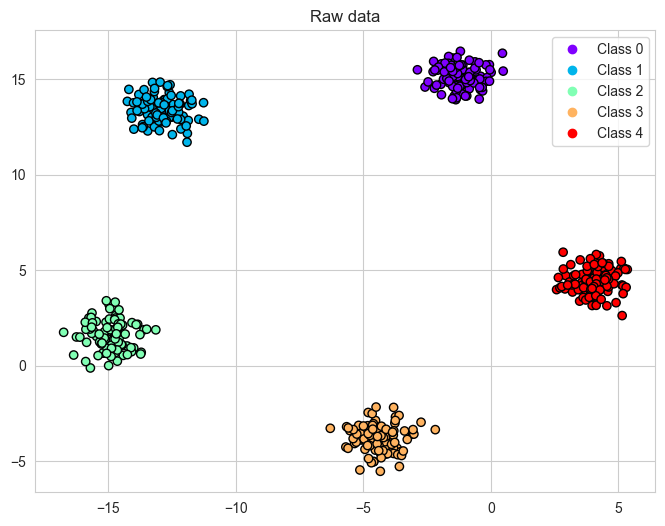

In [3]:
# load data
data = np.loadtxt('tren_data1___09.txt')

visualization.plot_data(data, title='Raw data')

In [4]:
x_train, y_train, y_train_raw, x_test, y_test, num_classes = data_prep(data, train_ratio=0.8, print_summary=True)

Number of training examples:  400
Number of testing examples:  100
------
x_train shape:  (2, 400)
y_train shape:  (5, 400)
x_test shape:  (2, 100)
y_test shape:  (1, 100)
------
Number of classes:  5


# Multi-class classification

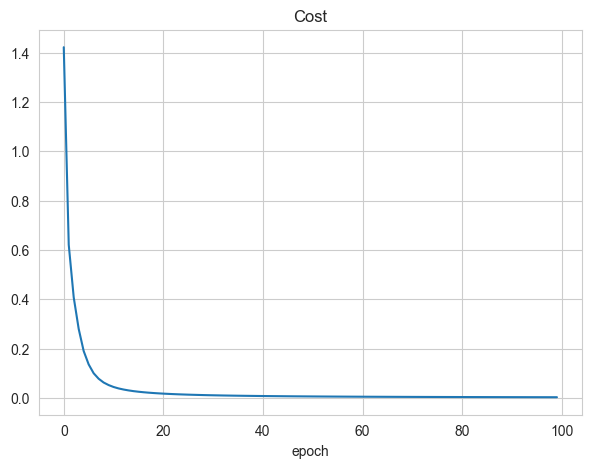

Cost after epoch 99: 0.002962545474467125


In [5]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 12, 5]  # set layer number and sizes

nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.softmax])
costs = nn.train(x_train, y_train, learning_rate=0.006, epochs=100, batch_size=10, print_cost=True, tolerance=0.00001,
                 min_cost=0.0001)
# nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.sigmoid])
# costs = nn.train(x_train, y_train, learning_rate=0.006, epochs=100, batch_size=10, print_cost=True, tolerance=0.00001, min_cost=0.0001, cost_fun="MSE")


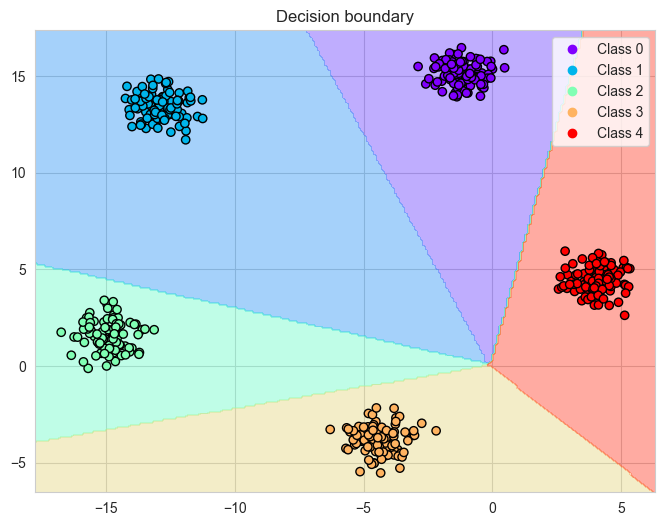

In [6]:
visualization.plot_decision_boundary(data, nn, title='Decision boundary')

accuracy:        100.0 %
confusion matrix: 


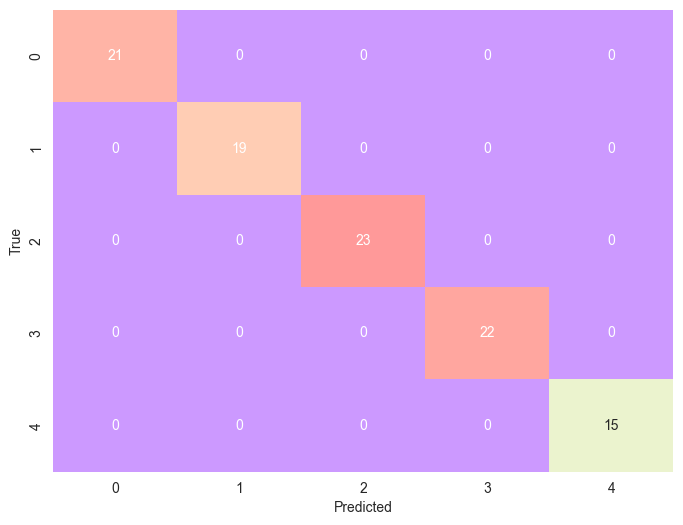

In [7]:
accuracy, confusion_matrix = nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy * 100, '%')
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

# One vs all

In [8]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 2, 1]  # set layer number and sizes


In [9]:
one_vs_all_nn = OneVsAllClassifier(dims, [DNNClassifier.sigmoid, DNNClassifier.sigmoid], num_classes)
# one_vs_all_nn.train(x_train, y_train_raw, learning_rate=0.06, epochs=50, batch_size=5, print_cost=True, cost_fun="MSE")
one_vs_all_nn.train(x_train, y_train_raw, learning_rate=0.06, epochs=50, batch_size=5, print_cost=True)

Training classifier 0...
Training model...
Cost after epoch 0: 0.45750671352371797
Cost after epoch 1: 0.3402705173567474
Cost after epoch 2: 0.3103477583218493
Cost after epoch 3: 0.28518037004512314
Cost after epoch 4: 0.26246707318361834
Cost after epoch 5: 0.242057160966215
Cost after epoch 6: 0.22431768561778523
Cost after epoch 7: 0.2081282510256864
Cost after epoch 8: 0.19388927531062622
Cost after epoch 9: 0.18108355379487712
Cost after epoch 10: 0.16966159852160928
Cost after epoch 11: 0.15925844796740987
Cost after epoch 12: 0.14998103969915774
Cost after epoch 13: 0.1414975348797245
Cost after epoch 14: 0.13383222196795544
Cost after epoch 15: 0.12689357055760295
Cost after epoch 16: 0.12052040101085404
Cost after epoch 17: 0.1146729963883955
Cost after epoch 18: 0.10929748302422682
Cost after epoch 19: 0.10434903444724264
Cost after epoch 20: 0.09981335060390051
Cost after epoch 21: 0.09561037205675622
Cost after epoch 22: 0.09173724540081248
Cost after epoch 23: 0.08813362

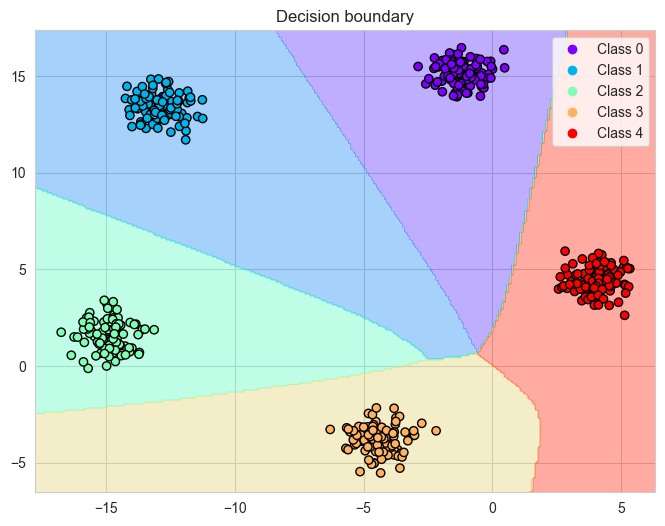

In [10]:
visualization.plot_decision_boundary(data, one_vs_all_nn, title='Decision boundary')

accuracy:        100.0 %
confusion matrix: 


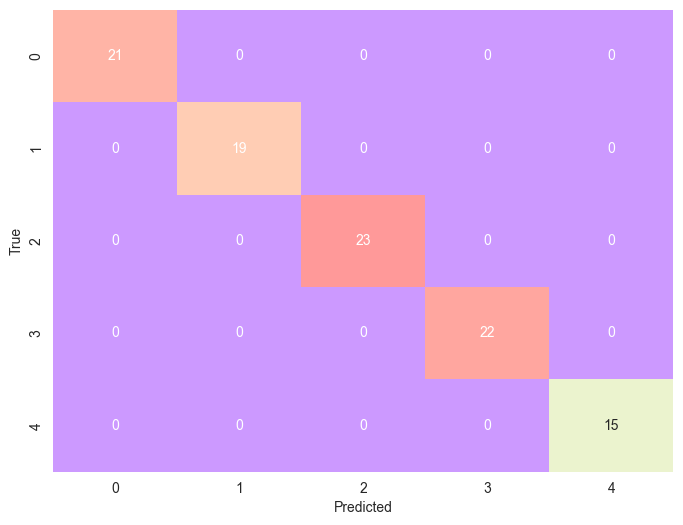

In [11]:
acc, conf = one_vs_all_nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy * 100, '%')
print('confusion matrix: ')
visualization.plot_confusion_matrix(conf)

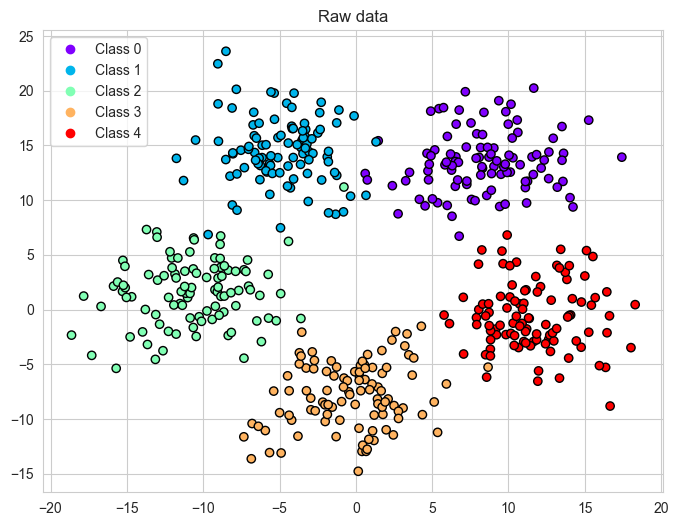

In [12]:
# load data
data = np.loadtxt('tren_data2___09.txt')

visualization.plot_data(data, title='Raw data')

In [13]:
x_train, y_train, y_train_raw, x_test, y_test, num_classes = data_prep(data, train_ratio=0.8, print_summary=True)


Number of training examples:  400
Number of testing examples:  100
------
x_train shape:  (2, 400)
y_train shape:  (5, 400)
x_test shape:  (2, 100)
y_test shape:  (1, 100)
------
Number of classes:  5


# Multi-class classification

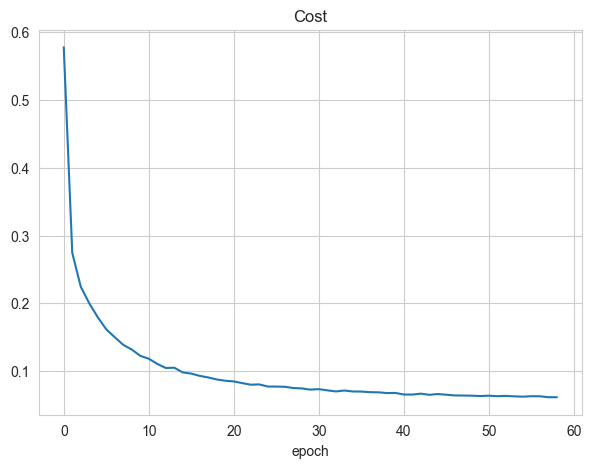

Early stopping at epoch 58.
Cost after epoch 58: 0.061673483761113125
Tolerance: 1e-05


In [14]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 24, 12, 5]  # set layer number and sizes

nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.relu, DNNClassifier.softmax])
costs = nn.train(x_train, y_train, learning_rate=0.006, epochs=100, batch_size=20, print_cost=True, tolerance=0.00001,
                 min_cost=0.0001, plot_cost=True)
# nn = DNNClassifier(dims, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.sigmoid])
# costs = nn.train(x_train, y_train, learning_rate=0.006, epochs=100, batch_size=10, print_cost=True, tolerance=0.00001, min_cost=0.0001, cost_fun="MSE", plot_cost=True)

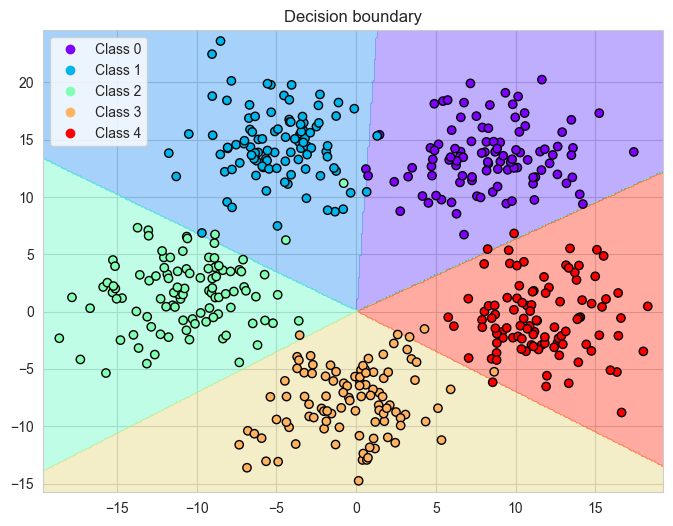

In [15]:
visualization.plot_decision_boundary(data, nn, title='Decision boundary')

accuracy:        98.0 %
confusion matrix: 


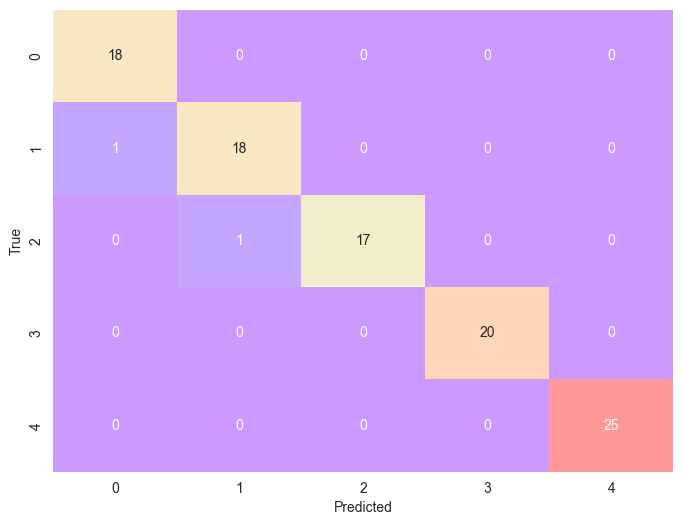

In [16]:
# accuracy, confusion_matrix = nn.evaluate(x_train, np.array(y_train_raw).reshape(1, len(y_train_raw)), confusion_matrix=True)
accuracy, confusion_matrix = nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy * 100, '%')
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

# One vs all

In [17]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 8, 2, 1]  # set layer number and sizes

one_vs_all_nn = OneVsAllClassifier(dims, [DNNClassifier.relu, DNNClassifier.relu, DNNClassifier.sigmoid], num_classes)
# one_vs_all_nn.train(x_train, y_train_raw, learning_rate=0.06, epochs=50, batch_size=5, print_cost=True, cost_fun="MSE")
one_vs_all_nn.train(x_train, y_train_raw, learning_rate=0.06, epochs=50, batch_size=10, print_cost=True,
                    plot_cost=False)

Training classifier 0...
Training model...
Cost after epoch 0: 0.373496432852222
Cost after epoch 1: 0.18246647310749226
Cost after epoch 2: 0.15001032715144336
Cost after epoch 3: 0.1307967328974121
Cost after epoch 4: 0.1146592057339311
Cost after epoch 5: 0.10771605679864837
Cost after epoch 6: 0.0950992191002642
Cost after epoch 7: 0.08934045575038926
Cost after epoch 8: 0.07905864576218094
Cost after epoch 9: 0.07638998687968454
Cost after epoch 10: 0.0723849863247257
Cost after epoch 11: 0.06858399547755809
Cost after epoch 12: 0.06663836336307163
Cost after epoch 13: 0.059757790261510624
Cost after epoch 14: 0.061267220222571694
Cost after epoch 15: 0.050412009670912285
Cost after epoch 16: 0.06390251775295011
Cost after epoch 17: 0.05713093961780756
Cost after epoch 18: 0.05088990311164447
Cost after epoch 19: 0.046024558229696075
Cost after epoch 20: 0.050647268543650314
Cost after epoch 21: 0.05126792548193275
Cost after epoch 22: 0.04376061646395948
Cost after epoch 23: 0.04

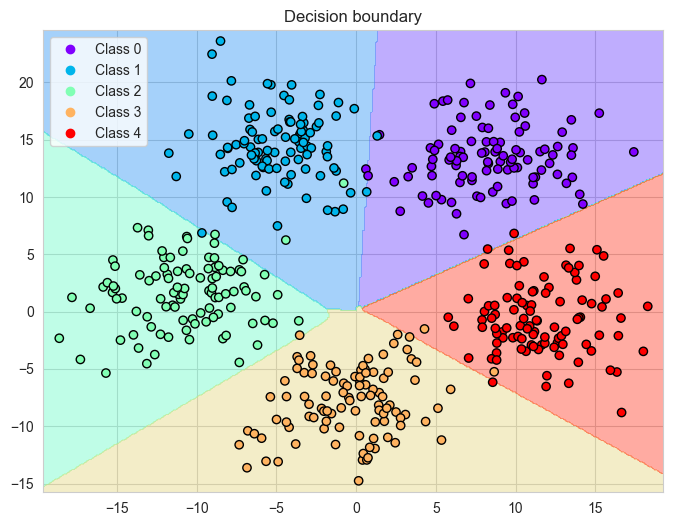

In [18]:
visualization.plot_decision_boundary(data, one_vs_all_nn, title='Decision boundary')

accuracy:        98.0 %
confusion matrix: 


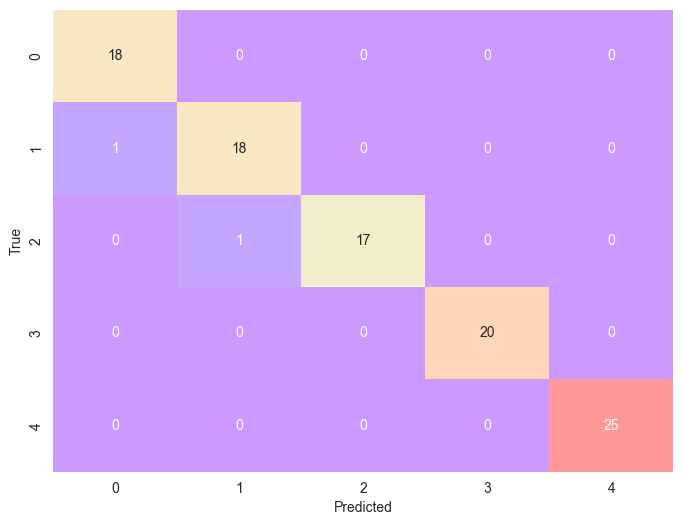

In [19]:
accuracy, confusion_matrix = one_vs_all_nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy * 100, '%')
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

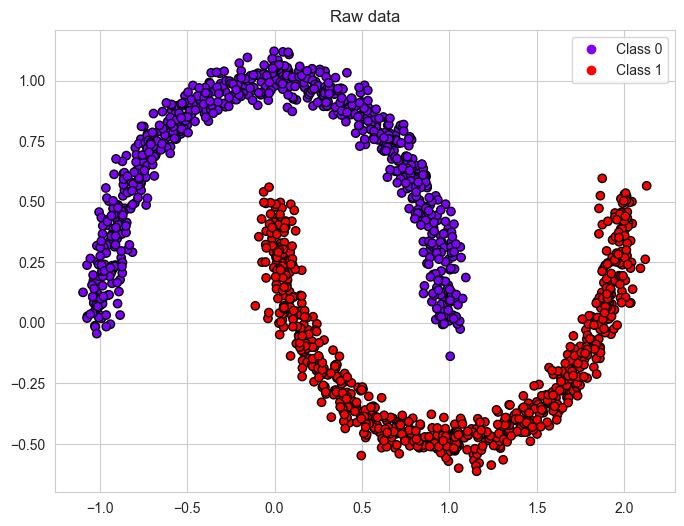

In [20]:
# load data
data = np.loadtxt('tren_data_moons.txt')

visualization.plot_data(data, title='Raw data')

In [21]:
x_train, y_train, y_train_raw, x_test, y_test, num_classes = data_prep(data, train_ratio=0.8, print_summary=True)

Number of training examples:  1200
Number of testing examples:  300
------
x_train shape:  (2, 1200)
y_train shape:  (2, 1200)
x_test shape:  (2, 300)
y_test shape:  (1, 300)
------
Number of classes:  2


In [22]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 6, 4, 3, 1]  # set layer number and sizes
y_train_raw_reshaped = np.array(y_train_raw).reshape(1, len(y_train_raw))

nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.relu, DNNClassifier.relu, DNNClassifier.sigmoid])
costs = nn.train(x_train, y_train_raw_reshaped, learning_rate=0.06, epochs=4000, batch_size=300, print_cost=True, plot_cost=False)

Training model...
Cost after epoch 0: 0.6901167916272546
Cost after epoch 1: 0.6893764089062462
Cost after epoch 2: 0.688414312956636
Cost after epoch 3: 0.6872356379878144
Cost after epoch 4: 0.6858508630911463
Cost after epoch 5: 0.6840530411870187
Cost after epoch 6: 0.6818889618169794
Cost after epoch 7: 0.6792429560800348
Cost after epoch 8: 0.6759558912789136
Cost after epoch 9: 0.6719796701379954
Cost after epoch 10: 0.6671754293509566
Cost after epoch 11: 0.6613637047606712
Cost after epoch 12: 0.6544159453728002
Cost after epoch 13: 0.6462770623426616
Cost after epoch 14: 0.6367925432534898
Cost after epoch 15: 0.6261527590226529
Cost after epoch 16: 0.6141652165073591
Cost after epoch 17: 0.6013922138914503
Cost after epoch 18: 0.5881705292358241
Cost after epoch 19: 0.5749720258043737
Cost after epoch 20: 0.5622617231152718
Cost after epoch 21: 0.5503122381985888
Cost after epoch 22: 0.5394937879794397
Cost after epoch 23: 0.5296445796990745
Cost after epoch 24: 0.5208497041

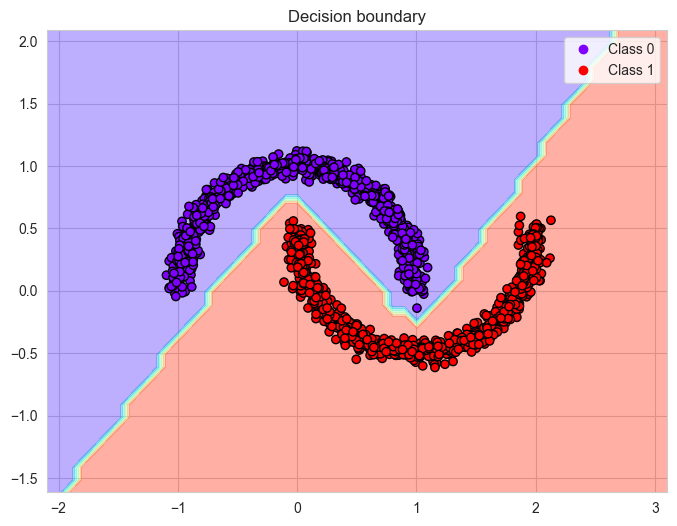

In [23]:
visualization.plot_decision_boundary(data, nn, title='Decision boundary')

In [24]:
accuracy = nn.evaluate(x_test, y_test, confusion_matrix=False)
print('accuracy:       ', accuracy * 100, '%')

accuracy:        100.0 %


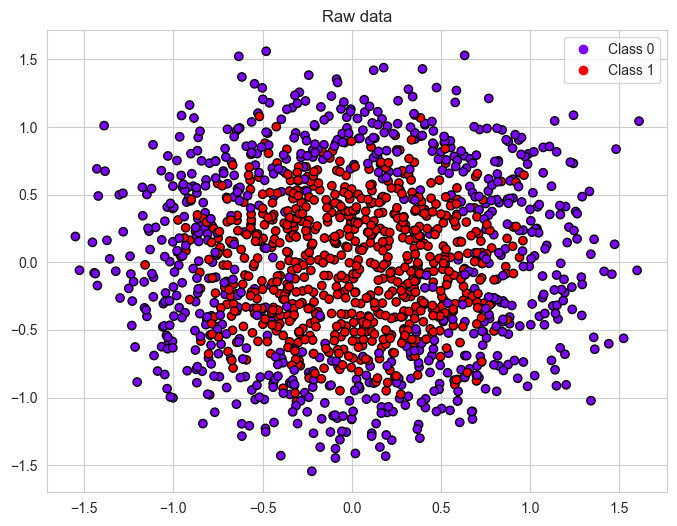

In [25]:
# load data
data = np.loadtxt('tren_data_circle.txt')

visualization.plot_data(data, title='Raw data')

In [26]:
x_train, y_train, y_train_raw, x_test, y_test, num_classes = data_prep(data, train_ratio=0.8, print_summary=True)

Number of training examples:  1200
Number of testing examples:  300
------
x_train shape:  (2, 1200)
y_train shape:  (2, 1200)
x_test shape:  (2, 300)
y_test shape:  (1, 300)
------
Number of classes:  2


In [27]:
input_layer = x_train.shape[0]  # set input layer size
dims = [input_layer, 6, 4, 3, 1]  # set layer number and sizes
y_train_raw_reshaped = np.array(y_train_raw).reshape(1, len(y_train_raw))

nn = DNNClassifier(dims, [DNNClassifier.relu, DNNClassifier.relu, DNNClassifier.relu, DNNClassifier.sigmoid])
costs = nn.train(x_train, y_train_raw_reshaped, learning_rate=0.06, epochs=1000, batch_size=300, print_cost=True, plot_cost=False)

Training model...
Cost after epoch 0: 0.6935262886110393
Cost after epoch 1: 0.6935114001876361
Cost after epoch 2: 0.6934493279593611
Cost after epoch 3: 0.6934035528282791
Cost after epoch 4: 0.6933905912655752
Cost after epoch 5: 0.6933719228386495
Cost after epoch 6: 0.6933252550203699
Cost after epoch 7: 0.6933323952282778
Cost after epoch 8: 0.693277882101309
Cost after epoch 9: 0.6932588081195357
Cost after epoch 10: 0.6932818466672199
Cost after epoch 11: 0.6932291368619041
Cost after epoch 12: 0.6932141600107192
Cost after epoch 13: 0.6932522985513095
Cost after epoch 14: 0.693195904136294
Cost after epoch 15: 0.6931762243684074
Cost after epoch 16: 0.6931602225972977
Cost after epoch 17: 0.693193708624459
Cost after epoch 18: 0.6931593746543955
Cost after epoch 19: 0.6931873016788201
Cost after epoch 20: 0.693142412334203
Cost after epoch 21: 0.6931299862059626
Cost after epoch 22: 0.693129777987552
Cost after epoch 23: 0.6931026380167903
Cost after epoch 24: 0.69309445286207

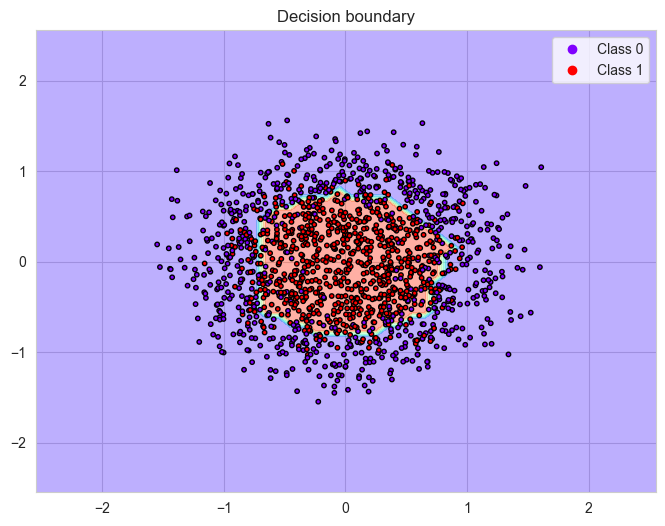

In [28]:

visualization.plot_decision_boundary(data, nn, title='Decision boundary', markersize=10)

In [29]:
accuracy = nn.evaluate(x_test, y_test, confusion_matrix=False)
print('accuracy:       ', accuracy * 100, '%')

accuracy:        84.33333333333334 %
